# Introduction
Based on a sample of roughly 450 observations, can we predict how often someone is depressed based on a number of parameters?

# Standard Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
csv = 'https://raw.githubusercontent.com/TahlonBrahic/Data-Science-Portfolio/main/Data%20Science/Social%20Mental%20Health%20Decision%20Tree/smmh.csv'
df = pd.read_csv(csv)
df

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


# Data Wrangling
Features trees don't require feature scaling so we won't be using sklearn's standard scaler. Instead, we will focus on cleaning data and feature engineering.

In [3]:
df.dropna(axis=0)
df = df.drop('5. What type of organizations are you affiliated with?', axis=1) # Add back later but it is cursed now

# Define Training Parameters

In [4]:
X = df[['18. How often do you feel depressed or down?']]
y = df.drop(X, axis=1); y = y.iloc[:, 8:18]

# Train and Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=24
)


# Training Data

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=24)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=24)

# Visualize Tree

[Text(0.5, 0.875, 'x[0] <= 2.5\ngini = 0.769\nsamples = 481\nvalue = [[20, 65, 129, 163, 104]\n[56, 86, 104, 118, 117]\n[117, 124, 124, 72, 44]\n[33, 77, 161, 109, 101]\n[40, 71, 95, 130, 145]\n[67, 81, 109, 115, 109]\n[110, 108, 101, 77, 85]\n[66, 103, 218, 61, 33]\n[150, 99, 122, 83, 27]\n[50, 109, 117, 119, 86]]'),
 Text(0.25, 0.625, 'x[0] <= 1.5\ngini = 0.736\nsamples = 143\nvalue = [[14, 30, 46, 35, 18]\n[36, 36, 29, 28, 14]\n[62, 34, 29, 13, 5]\n[25, 35, 50, 19, 14]\n[29, 45, 43, 21, 5]\n[50, 38, 27, 18, 10]\n[60, 34, 31, 12, 6]\n[23, 23, 68, 19, 10]\n[65, 29, 31, 12, 6]\n[36, 51, 33, 18, 5]]'),
 Text(0.125, 0.375, 'gini = 0.671\nsamples = 60\nvalue = [[11, 14, 17, 12, 6]\n[24, 12, 13, 7, 4]\n[38, 10, 6, 5, 1]\n[21, 15, 16, 3, 5]\n[24, 20, 10, 6, 0]\n[33, 12, 9, 2, 4]\n[36, 9, 11, 1, 3]\n[15, 7, 26, 7, 5]\n[37, 9, 8, 3, 3]\n[24, 16, 13, 4, 3]]'),
 Text(0.375, 0.375, 'gini = 0.734\nsamples = 83\nvalue = [[3, 16, 29, 23, 12]\n[12, 24, 16, 21, 10]\n[24, 24, 23, 8, 4]\n[4, 20, 34, 16

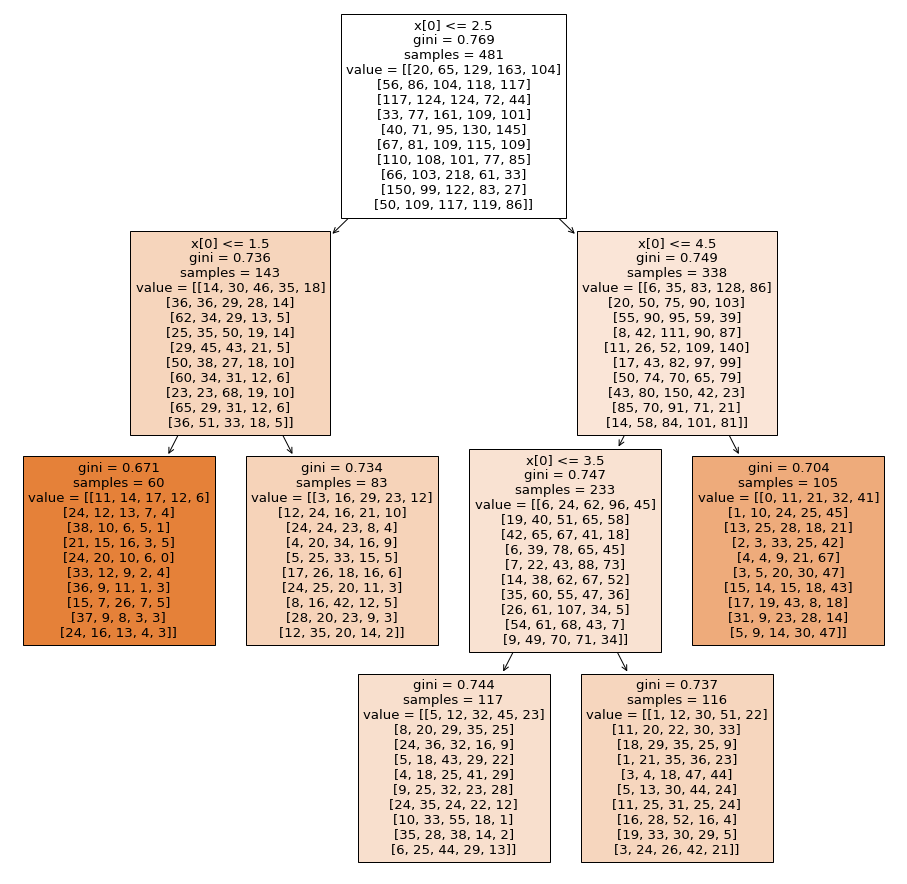

In [8]:
from sklearn import tree

plt.figure(figsize=(16,16))
tree.plot_tree(tree_clf, filled=True)